## 3.5 特征离散化

### 3.5.1 无监督离散化

**基础知识**

In [1]:
import pandas as pd
ages = pd.DataFrame({'years':[10, 14, 30, 53, 67, 32, 45], 'name':['A', 'B', 'C', 'D', 'E', 'F', 'G']})
ages

,years,name
0,10,A
1,14,B
2,30,C
3,53,D
4,67,E
5,32,F
6,45,G


In [2]:
pd.cut(ages['years'],3)

0    (9.943, 29.0]
1    (9.943, 29.0]
2     (29.0, 48.0]
3     (48.0, 67.0]
4     (48.0, 67.0]
5     (29.0, 48.0]
6     (29.0, 48.0]
Name: years, dtype: category
Categories (3, interval[float64]): [(9.943, 29.0] < (29.0, 48.0] < (48.0, 67.0]]

In [3]:
pd.qcut(ages['years'],3)

0    (9.999, 30.0]
1    (9.999, 30.0]
2    (9.999, 30.0]
3     (45.0, 67.0]
4     (45.0, 67.0]
5     (30.0, 45.0]
6     (30.0, 45.0]
Name: years, dtype: category
Categories (3, interval[float64]): [(9.999, 30.0] < (30.0, 45.0] < (45.0, 67.0]]

In [4]:
klass = pd.cut(ages['years'], 3, labels=[0, 1, 2])    # ①
ages['label'] = klass
ages

,years,name,label
0,10,A,0
1,14,B,0
2,30,C,1
3,53,D,2
4,67,E,2
5,32,F,1
6,45,G,1


In [5]:
ages2 = pd.DataFrame({'years':[10, 14, 30, 53, 300, 32, 45], 'name':['A', 'B', 'C', 'D', 'E', 'F', 'G']})
klass2 = pd.cut(ages2['years'], 3, labels=['Young', 'Middle', 'Senior'])    # ②
ages2['label'] = klass2
ages2

,years,name,label
0,10,A,Young
1,14,B,Young
2,30,C,Young
3,53,D,Young
4,300,E,Senior
5,32,F,Young
6,45,G,Young


In [6]:
ages2 = pd.DataFrame({'years':[10, 14, 30, 53, 300, 32, 45], 'name':['A', 'B', 'C', 'D', 'E', 'F', 'G']})
klass2 = pd.cut(ages2['years'], bins=[9, 30, 50, 300], labels=['Young', 'Middle', 'Senior'])    # ③
ages2['label'] = klass2
ages2

,years,name,label
0,10,A,Young
1,14,B,Young
2,30,C,Young
3,53,D,Senior
4,300,E,Senior
5,32,F,Middle
6,45,G,Middle


In [7]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')   # ④
trans = kbd.fit_transform(ages[['years']])    # ⑤
ages['kbd'] = trans[:, 0]    # ⑥
ages

,years,name,label,kbd
0,10,A,0,0.0
1,14,B,0,0.0
2,30,C,1,1.0
3,53,D,2,2.0
4,67,E,2,2.0
5,32,F,1,1.0
6,45,G,1,1.0


**项目案例**

In [8]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
iris = load_iris()

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X = iris.data
y = iris.target
X = X[:, [2, 3]]

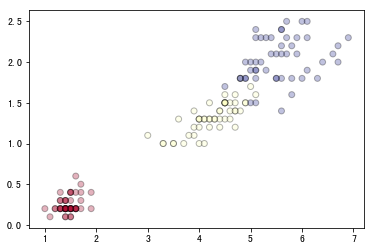

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3,  cmap=plt.cm.RdYlBu, edgecolor='black')

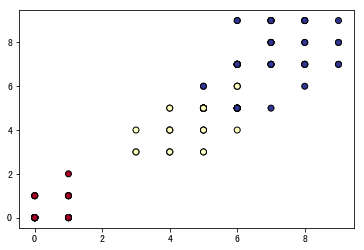

In [12]:
Xd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform').fit_transform(X)
plt.scatter(Xd[:, 0], Xd[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')

In [13]:
dtc = DecisionTreeClassifier(random_state=0)    # ⑦
score1 = cross_val_score(dtc, X, y, cv=5)    # ⑧
score2 = cross_val_score(dtc, Xd, y, cv=5)    # ⑨

In [14]:
np.mean(score1), np.std(score1)

(0.9466666666666667, 0.039999999999999994)

In [15]:
np.mean(score2), np.std(score2)

(0.96, 0.03265986323710903)

In [16]:
km = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans').fit_transform(X)    # ⑩
s = cross_val_score(dtc, km, y, cv=5)
np.mean(s), np.std(s)

(0.9733333333333334, 0.02494438257849294)

**动手练习**

In [17]:
import numpy as np
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)
X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

Text(0.5, 1.0, '已离散化结果')

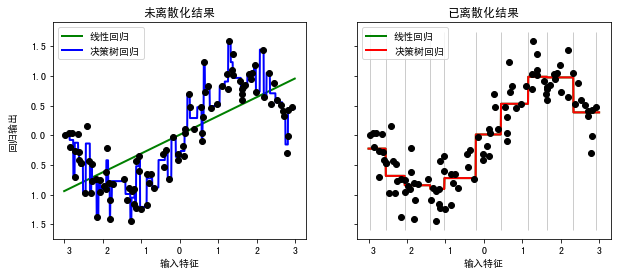

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# 离散化
kbd = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = kbd.fit_transform(X)

# 利用线性回归模型对原始数据进行预测
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
lreg = LinearRegression().fit(X, y)
ax1.plot(line, lreg.predict(line), 
         linewidth=2, color='green', label='线性回归')
dreg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, dreg.predict(line), 
         linewidth=2, color='blue', label="决策树回归")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc='best')
ax1.set_ylabel("回归输出")
ax1.set_xlabel("输入特征")
ax1.set_title("未离散化结果")

# 对离散化之后的数据进行预测
line_binned = kbd.transform(line)
lreg_binned = LinearRegression().fit(X_binned, y)
ax2.plot(line, lreg_binned.predict(line_binned), 
         linewidth=2, color='green', 
         linestyle='-', label='线性回归')
dreg_binned = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(line, dreg_binned.predict(line_binned), 
         linewidth=2, color='red', 
         linestyle='-', label="决策树回归")
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(kbd.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc='best')
ax2.set_xlabel("输入特征")
ax2.set_title("已离散化结果")

### 3.5.2 有监督离散化

**基础知识**

In [22]:
import entropy_based_binning as ebb
A = np.array([[1,1,2,3,3], [1,1,0,1,0]])
ebb.bin_array(A, nbins=2, axis=1)

array([[0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0]])

**项目案例**

In [23]:
from mdlp.discretization import MDLP
from sklearn.datasets import load_iris
transformer = MDLP()
iris = load_iris()
X, y = iris.data, iris.target
X_disc = transformer.fit_transform(X, y)
X_disc

array([[0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 2, 0, 0],
       [1, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [1, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 1,